In [45]:
import pandas as pd
from fbprophet import Prophet
import requests
import json

In [83]:
url = "https://datalab.naver.com/shoppingInsight/getKeywordClickTrend.naver"
payload = {
    "cid": "50000006",
    "timeUnit":"date",
    "startDate":"2017-10-10",
    "endDate":"2019-10-10",
    "age":"20",
    "gender":"f",
    "device":"",
    "keyword":"프리바이오틱스"
}

headers = {
    'Content-Type': "application/x-www-form-urlencoded; charset=UTF-8",
    'cookie': "NNB=FHXSCWU6E6PV2; _datalab_cid=50000006",
    'origin': "https://datalab.naver.com",
    'referer': "https://datalab.naver.com/shoppingInsight/sKeyword.naver",
    'sec-fetch-mode': "cors",
    'sec-fetch-site': "same-origin",
    'user-agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36",
    'x-requested-with': "XMLHttpRequest",
    'Accept': "*/*",
    'Cache-Control': "no-cache",
    'Host': "datalab.naver.com",
    'Accept-Encoding': "gzip, deflate",
    'Connection': "keep-alive",
    'cache-control': "no-cache"
    }

response = requests.request("POST", url, data=payload, headers=headers)

In [84]:
data = response.json()
df = pd.io.json.json_normalize(data['result'][0]['data'])

In [90]:
df

,ds,y
0,2017-10-10,3.94857
1,2017-10-11,1.83654
2,2017-10-12,0.64279
3,2017-10-13,1.65289
4,2017-10-14,5.41781
5,2017-10-15,1.19375
6,2017-10-16,1.92837
7,2017-10-17,1.56106
8,2017-10-18,15.51882
9,2017-10-19,3.21395


In [87]:
df.period= df.period.map(lambda x: '{}-{}-{}'.format(x[:4], x[4:6], x[6:]))

In [88]:
df.columns = ['ds','y']

In [89]:
df[:-30]

,ds,y
0,2017-10-10,3.94857
1,2017-10-11,1.83654
2,2017-10-12,0.64279
3,2017-10-13,1.65289
4,2017-10-14,5.41781
5,2017-10-15,1.19375
6,2017-10-16,1.92837
7,2017-10-17,1.56106
8,2017-10-18,15.51882
9,2017-10-19,3.21395


In [61]:
df[-30:]

,ds,y
701,2019-09-11,7.07070
702,2019-09-12,12.02938
703,2019-09-13,20.38567
704,2019-09-14,17.44719
705,2019-09-15,20.66115
706,2019-09-16,17.07988
707,2019-09-17,22.95684
708,2019-09-18,19.92653
709,2019-09-19,35.72084
710,2019-09-20,13.86593


In [62]:
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df[:-30])

In [63]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
726,2019-10-06
727,2019-10-07
728,2019-10-08
729,2019-10-09
730,2019-10-10


In [64]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
726,2019-10-06,22.688587,9.419524,36.572691
727,2019-10-07,19.697405,5.680256,32.670886
728,2019-10-08,19.267954,5.899933,31.583064
729,2019-10-09,17.352727,3.380996,29.377606
730,2019-10-10,16.812317,4.528171,29.864888


In [82]:
(forecast[-30:].yhat - df[-30:].y)

701     5.924600
702     0.263945
703    -8.621124
704    -0.894697
705    -1.837749
706    -1.202327
707    -7.435209
708    -6.227173
709   -22.457921
710    -0.905976
711    -0.249913
712    -1.969832
713     5.376471
714     4.987677
715    -7.648842
716    -0.384199
717   -19.186148
718     6.473008
719     1.730294
720     0.898706
721     1.691397
722    -9.765069
723    -2.969498
724     1.000231
725     7.202852
726     7.261597
727   -16.390745
728     7.605884
729    -0.186293
730    -0.175743
dtype: float64

In [72]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,yreal
0,2017-10-10,3.867311,-12.194226,16.093730,3.867311,3.867311,-2.059189,-2.059189,-2.059189,-0.319878,...,0.332035,0.332035,-2.071346,-2.071346,-2.071346,0.0,0.0,0.0,1.808122,NaN
1,2017-10-11,3.890178,-13.492775,12.482458,3.890178,3.890178,-3.975216,-3.975216,-3.975216,-0.319878,...,-1.700038,-1.700038,-1.955300,-1.955300,-1.955300,0.0,0.0,0.0,-0.085038,NaN
2,2017-10-12,3.913046,-13.870189,12.155483,3.913046,3.913046,-4.514125,-4.514125,-4.514125,-0.319878,...,-2.366296,-2.366296,-1.827952,-1.827952,-1.827952,0.0,0.0,0.0,-0.601079,NaN
3,2017-10-13,3.935913,-13.990193,13.059351,3.935913,3.935913,-4.922126,-4.922126,-4.922126,-0.319878,...,-2.912729,-2.912729,-1.689519,-1.689519,-1.689519,0.0,0.0,0.0,-0.986213,NaN
4,2017-10-14,3.958781,-10.056278,16.930519,3.958781,3.958781,-0.052578,-0.052578,-0.052578,-0.319878,...,1.808189,1.808189,-1.540890,-1.540890,-1.540890,0.0,0.0,0.0,3.906203,NaN
5,2017-10-15,3.981648,-7.216471,20.169086,3.981648,3.981648,2.264103,2.264103,2.264103,-0.319878,...,3.967570,3.967570,-1.383590,-1.383590,-1.383590,0.0,0.0,0.0,6.245751,NaN
6,2017-10-16,4.004516,-10.513249,17.436022,4.004516,4.004516,-0.668347,-0.668347,-0.668347,-0.319878,...,0.871268,0.871268,-1.219737,-1.219737,-1.219737,0.0,0.0,0.0,3.336169,NaN
7,2017-10-17,4.027383,-9.814890,16.805809,4.027383,4.027383,-1.039808,-1.039808,-1.039808,-0.319878,...,0.332035,0.332035,-1.051965,-1.051965,-1.051965,0.0,0.0,0.0,2.987575,NaN
8,2017-10-18,4.050251,-12.897951,13.389926,4.050251,4.050251,-2.903240,-2.903240,-2.903240,-0.319878,...,-1.700038,-1.700038,-0.883324,-0.883324,-0.883324,0.0,0.0,0.0,1.147011,NaN
9,2017-10-19,4.073118,-13.164885,13.461475,4.073118,4.073118,-3.403346,-3.403346,-3.403346,-0.319878,...,-2.366296,-2.366296,-0.717172,-0.717172,-0.717172,0.0,0.0,0.0,0.669772,NaN


In [71]:
forecast[['yhat','yreal']]

,yhat,yreal
0,1.808122,NaN
1,-0.085038,NaN
2,-0.601079,NaN
3,-0.986213,NaN
4,3.906203,NaN
5,6.245751,NaN
6,3.336169,NaN
7,2.987575,NaN
8,1.147011,NaN
9,0.669772,NaN


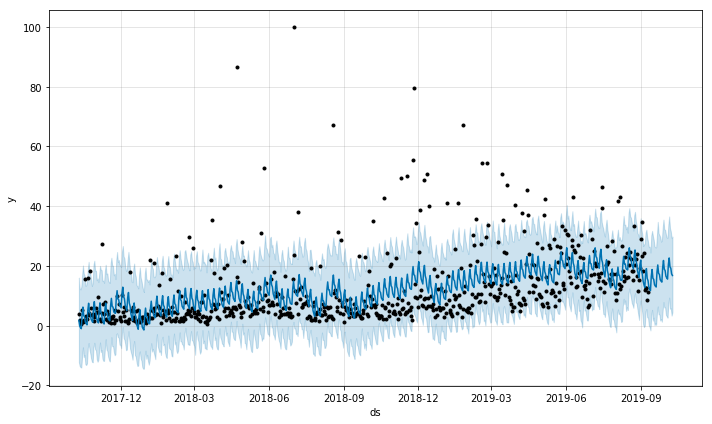

In [65]:
fig1 = m.plot(forecast)


,DS,Y
0,2018-03-30,0.25608
1,2018-05-14,0.89628
2,2018-05-15,1.40845
3,2018-05-16,0.64020
4,2018-05-17,0.38412
5,2018-05-18,0.12804
6,2018-05-19,2.43277
7,2018-05-20,1.28040
8,2018-05-21,5.50576
9,2018-05-22,12.03585


In [ ]:
{"uid":" 123",
"sid":" 12",
"url":" https":"//www.naver.com",
"referrer":" https":"//www.naver.com",
"timestamp":"1308209813",
"duration":" 123.231",
"uptime":" 123.231",
"title":" ddd",
"channel":" aaa",
"gender":"1",
"age":"12",
"useragent":"aa"}